In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("./cardio_train.csv",sep=";");

# Step 1 : Quick analysis in data

## 1.1 identify types
## 1.2 check null values are there

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [13]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [16]:
df.age = np.floor((df.age)/365)

# Step 2: Remove Duplicates

In [17]:
df = df.drop(["id"],axis=1)
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool>

## Step: 3 Identification of outlier using z score 

In [18]:
from scipy import stats

z = np.abs(stats.zscore(df['age']))
print(df[z > 3])

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
6219   29.0       1     175    59.0    120     80            1     1      0   
22343  29.0       2     175    92.0    100     60            1     1      0   
30666  29.0       1     159    59.0    120     80            1     1      0   
55905  30.0       1     160    59.0    110     70            1     1      0   

       alco  active  cardio  
6219      0       1       0  
22343     0       1       0  
30666     0       1       0  
55905     0       1       0  


# Height and Weight aren't in range
### expected height range : height > 100 and height < 220 
### expected weight range : weight > 30 and weight < 200 

In [19]:
df = df[(df['height'] > 100) & (df['height'] < 220)]
df = df[(df['weight'] > 30) & (df['weight'] < 200)]

# ap_hi and ap_lo aren't in range
### expected range : ap_hi > ap_lo and ap_hi > 90 and ap_hi < 250
### expected range : ap_hi > 50 and ap_lo < 180

In [20]:
df = df[(df['ap_hi'] >= df['ap_lo']) &
        (df['ap_hi'] > 90) & (df['ap_hi'] < 250) &
        (df['ap_lo'] > 50) & (df['ap_lo'] < 180)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67563 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          67563 non-null  float64
 1   gender       67563 non-null  int64  
 2   height       67563 non-null  int64  
 3   weight       67563 non-null  float64
 4   ap_hi        67563 non-null  int64  
 5   ap_lo        67563 non-null  int64  
 6   cholesterol  67563 non-null  int64  
 7   gluc         67563 non-null  int64  
 8   smoke        67563 non-null  int64  
 9   alco         67563 non-null  int64  
 10  active       67563 non-null  int64  
 11  cardio       67563 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.7 MB


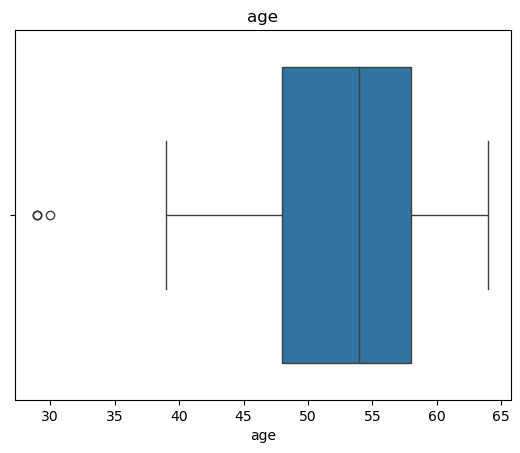

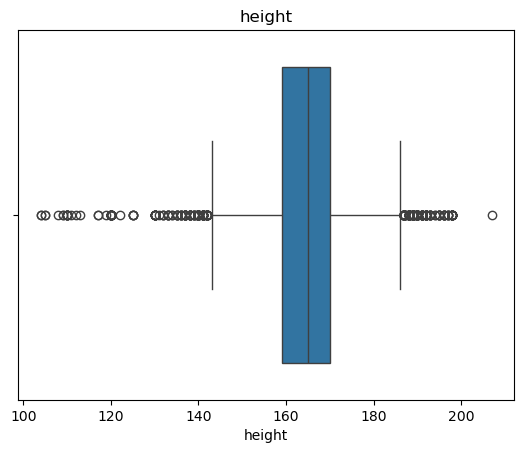

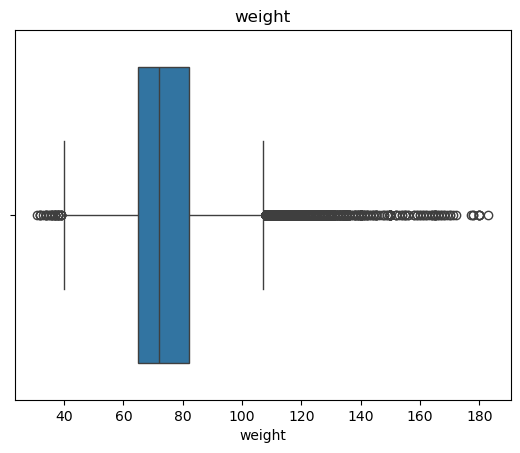

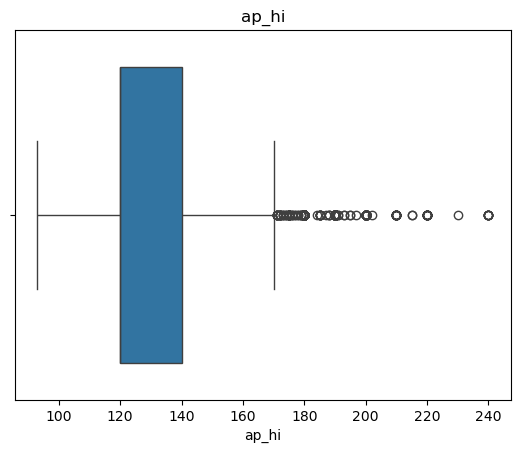

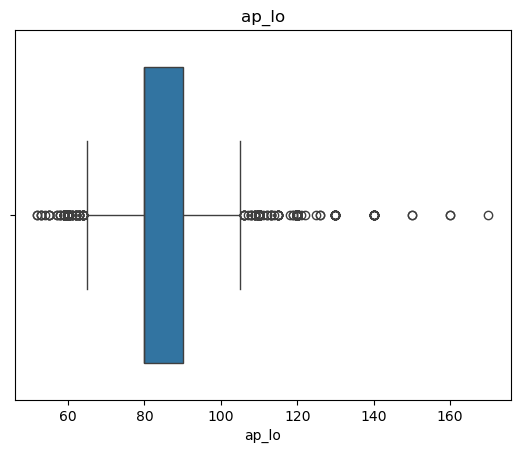

In [21]:
numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


## Step:4 Analysis (feature engineering)
#### find the BMI level

In [22]:
# BMI = weight / (height/100)^2
df['BMI'] = df['weight'] / (df['height']/100)**2


#### find high blood pressure person report status

#### 1-> high , 2-> medium, 3-> Normal

In [23]:
df["report_status"] = np.where(
    (df['ap_hi'] >= 140) | (df['ap_lo'] >= 90), 1,
    np.where(
        (df['ap_hi'] >= 120) & (df['ap_lo'] < 80), 2,
        3
    )
)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,report_status
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,3
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,47.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,3


### check normalization of the data
#### Bell shaped     - Looks normal                        
#### Right-skewed    - Many small values, few high outliers 
#### Very irregular  - Not normal at all                    


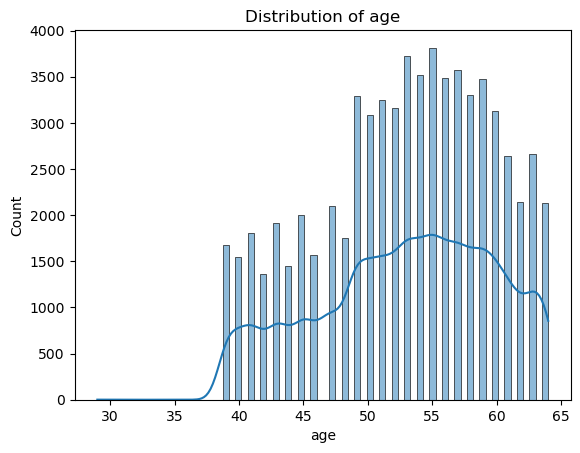

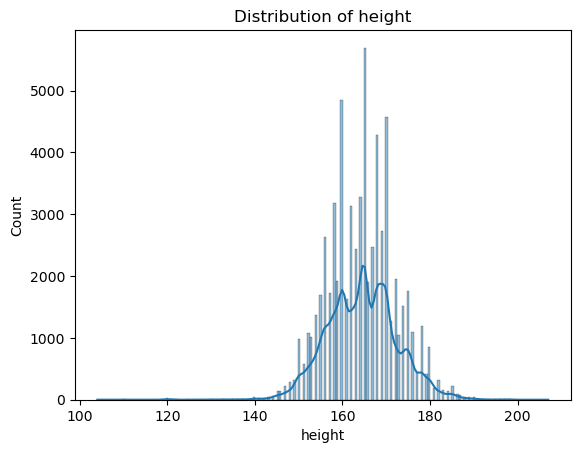

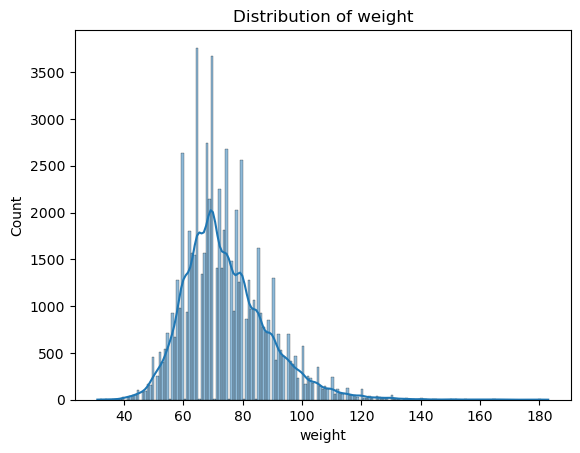

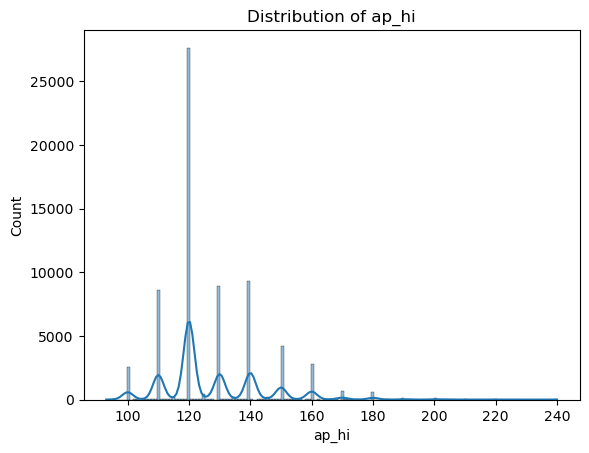

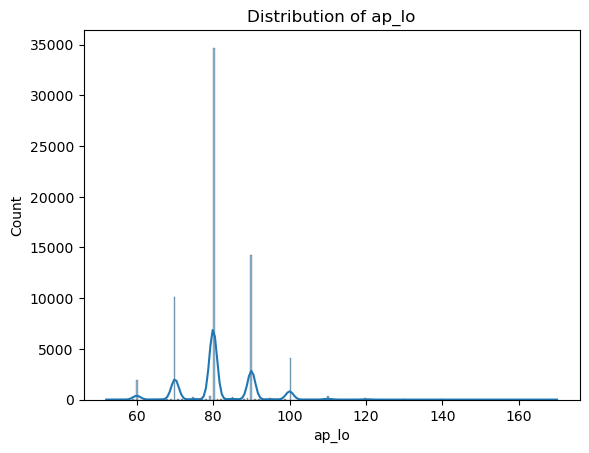

In [24]:
numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Count based on Report Status 

In [34]:
df.groupby("report_status")["age"].count()

report_status
1    23524
2     3893
3    40146
Name: age, dtype: int64

In [ ]:
group = df.groupby('smoke')['cardio'].mean() * 100
group.plot(kind='pie')
plt.title("Cardio Percentage by Smoking Status")
plt.show()

In [31]:
df.to_csv("cardio_cleaned.csv", index=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,report_status
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,3
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,47.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.0,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,3
69996,61.0,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,3
